# Ex01 - Aprendendo Numpy - GABARITO

1. Exercite o uso do Numpy, através de pequenos exemplos utilizando principalmente a criação de arrays. Testes conceitos vistos nos tutoriais, como: usando os índices de um array, índices negativos, índices bidimensionais, slicing, reshape, transposição. Aproveite para explorar os recursos de documentação do jupyter e explique a medida que for realizando os diversos testes. Exemplo de uma sequência para o exercício:
    - crie um array
    - acesse elementos, linhas e colunas específicas do array, modificando seus valores
    - altere o tamanho do array
    - teste operações matriciais com arrays

### Visualizando arrays em forma de imagem

In [7]:
import numpy as np

f = np.ones((100,120))
print("Imagem constante:\n",f)

Imagem constante:
 [[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


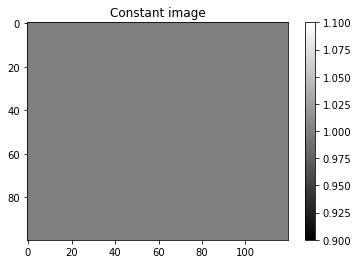

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Constant image')
plt.imshow(f,cmap='gray')
plt.colorbar()

# Parte 1 - aprendendo numpy

Nesta parte da questão espera-se alguns experimentos em torno de criação de arrays, slicing, operações matriciais.

# Parte 2 - Entendendo resolução espacial e radiométrica

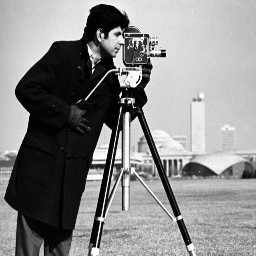

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
img = Image.open('../ea979/data/cameraman.tif')
img

1. **Entendendo a resolução espacial:** Reproduza as figuras dos slides 19 e 20 (Cap1.pdf). Use, no lugar da imagem da rosa, a imagem do cameraman.
2. **Entendendo a resolução radiométrica:** Visualize a imagem do cameraman em níveis de cinza e altere progressivamente a quantização (slide 26).

## Entendendo a resolução espacial

## Reproduzindo o slide 19

Antes de reproduzir  o slide 19, devemos pensar o que o slide está mostrando e o que queremos realizar. O enunciado do exercício diz que queremos entender a resolução espacial e o slide 19 nos mostra uma mesma imagem com resolução cada vez menor. Portanto, queremos gerar versões da imagem original, *cameraman*, com resoluções menores. Primeiro, é uma boa ideia checar qual a resolução da imagem original.

In [176]:
img.size

(256, 256)

Posso querer converter a imagem *img* para um array do Numpy e usar outras funções para visualizar o array e descobrir seu tamanho.

In [177]:
g = np.array(img)
g.shape

(256, 256)

Agora vou criar versões reduzidas da mesma imagem. Posso fazer isso de algumas formas diferentes. A primeira delas seria simplesmente construir uma nova imagem pulando linhas e colunas com o slicing (que foi praticado na primeira parte do exercício).

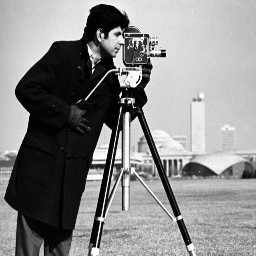

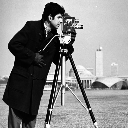

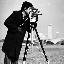

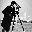

In [179]:
# gerando uma imagem que tem a metade das linhas e colunas da imagem original
g1a = g[::2,::2]
# gerando uma imagem que tem a metade das linhas e colunas da imagem já reduzida
g2a = g1a[::2, ::2]
# gerando uma imagem que tem a metade das linhas e colunas da imagem já reduzida
g3a = g2a[::2, ::2]
# gerando uma imagem que tem a metade das linhas e colunas da imagem já reduzida
g4a = g3a[::2, ::2]
# gerando uma imagem que tem a metade das linhas e colunas da imagem já reduzida
g5a = g4a[::2, ::2]
# gerando uma imagem que tem a metade das linhas e colunas da imagem já reduzida
g6a = g5a[::2, ::2]

display(Image.fromarray(g))
display(Image.fromarray(g1a))
display(Image.fromarray(g2a))
display(Image.fromarray(g3a))
display(Image.fromarray(g4a))
display(Image.fromarray(g5a))
display(Image.fromarray(g6a))

Posso usar o slicing de 2 em 2 nas imagens reduzidas que vão sendo geradas, ou posso usar na original e ir aumentando o número de colunas que são puladas

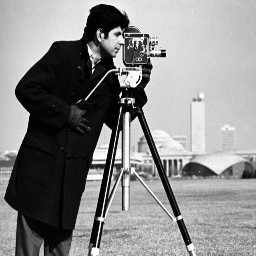

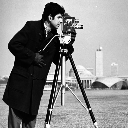

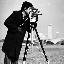

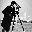

In [180]:
# gerando uma imagem que tem a metade das linhas e colunas da imagem original
g1b = g[::2, ::2]
# gerando uma imagem que tem 1/4 das linhas e colunas da imagem original
g2b = g[::4, ::4]
# gerando uma imagem que tem 1/8 das linhas e colunas da imagem original
g3b = g[::8, ::8]
# gerando uma imagem que tem 1/16 das linhas e colunas da imagem original
g4b = g[::16, ::16]
# gerando uma imagem que tem 1/32 das linhas e colunas da imagem original
g5b = g[::32, ::32]
# gerando uma imagem que tem 1/64 das linhas e colunas da imagem original
g6b = g[::64, ::64]

display(Image.fromarray(g))
display(Image.fromarray(g1b))
display(Image.fromarray(g2b))
display(Image.fromarray(g3b))
display(Image.fromarray(g4b))
display(Image.fromarray(g5b))
display(Image.fromarray(g6b))


O importante é entender que a matriz que representa a imagem foi modificada e contém cada vez menos pixels. Podemos veriifcar isso imprimindo informações da imagem.

In [181]:
print(g.shape)
print(g1a.shape)
print(g2a.shape)
print(g3a.shape)
print(g4a.shape)
print(g5a.shape)
print(g6a.shape)

(256, 256)
(128, 128)
(64, 64)
(32, 32)
(16, 16)
(8, 8)
(4, 4)


## Reproduzindo o slide 20

O slide 20, apesar de muito parecido com o 19, tem um conceito bem diferente. Ele está mostrando as mesmas imagens do slide 19, porém todas mostradas usando a mesma escala, evidenciando que o *tamanho* dos pixels mudou. Na verdade, não é que o tamanho do pixel mudou, mas que a região que cada pixel representa agora é muito maior e que, portanto, se olharmos todas as imagens na mesma escala, as de menor resolução terão o efeito que se chama *pixelado*. Portanto, o queremos agora é gerar versões das imagens reduzidas, que sejam apresentadas no tamanho da original, mas que mostre os efeitos da redução do número de pixels.

### Usando resize
Há várias formas de se fazer isso. Uma delas é usando resize. A função resize aumenta a matriz original, repetindo os pixels quantas vezes for necessário (veja documentação da função neste [link](https://pillow.readthedocs.io/en/3.1.x/reference/Image.html)).

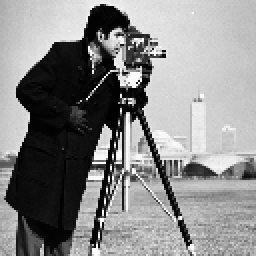

In [190]:
g1a_copy = Image.fromarray(g1a)
h1a = g1a_copy.resize((256,256))
display(h1a)

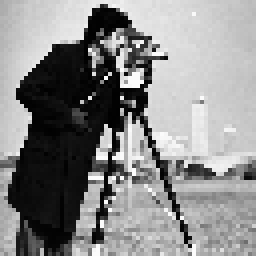

In [191]:
g2a_copy = Image.fromarray(g2a)
h2a = g2a_copy.resize((256,256))
display(h2a)

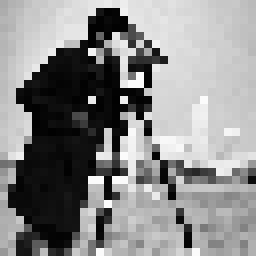

In [192]:
g3a_copy = Image.fromarray(g3a)
h3a = g3a_copy.resize((256,256))
display(h3a)

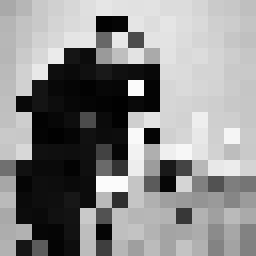

In [193]:
g4a_copy = Image.fromarray(g4a)
h4a = g4a_copy.resize((256,256))
display(h4a)

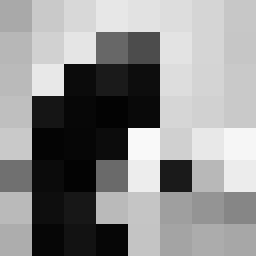

In [194]:
g5a_copy = Image.fromarray(g5a)
h5a = g5a_copy.resize((256,256))
display(h5a)

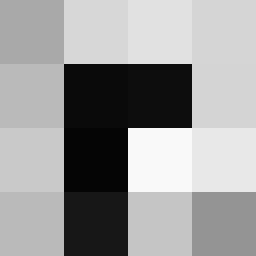

In [195]:
g6a_copy = Image.fromarray(g6a)
h6a = g6a_copy.resize((256,256))
display(h6a)

Vejam que, enquanto **g6a** é uma matriz de tamanho 4x4, **h6a** é uma matriz 256x256, com os pixels da imagem **g6a** repetidos.

In [201]:
print('g6a =')
print(np.array(g6a))
print('shape de g6a',g6a.shape)
print('h6a =')
print(np.array(h6a))
print('shape de h6a',h6a.size)

g6a =
[[169 215 225 213]
 [186  10  13 212]
 [201   5 249 232]
 [186  23 197 148]]
shape de g6a (4, 4)
h6a =
[[169 169 169 ..., 213 213 213]
 [169 169 169 ..., 213 213 213]
 [169 169 169 ..., 213 213 213]
 ..., 
 [186 186 186 ..., 148 148 148]
 [186 186 186 ..., 148 148 148]
 [186 186 186 ..., 148 148 148]]
shape de h6a (256, 256)


### Usando slicing

Também é possível usar o slicing e replicando cada coluna e cada linha.

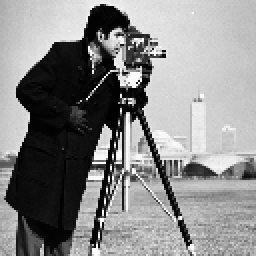

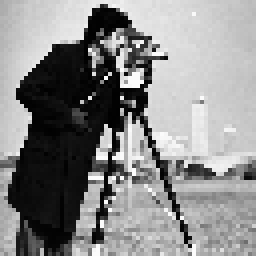

In [202]:
# A partir da imagem reduzida g1a cria a imagem aumentada h1a, por replicação de pixels
H,W = g1a.shape
h1 = np.zeros( (2*H,2*W), 'uint8')
h1[ ::2, ::2] = g1a
h1[1::2, ::2] = g1a
h1[1::2,1::2] = g1a
h1[ ::2,1::2] = g1a

# A partir da imagem reduzida g2a cria a imagem aumentada h2, por replicação de pixels
H,W = g2a.shape
h2b = np.zeros( (2*H,2*W), 'uint8')
h2b[ ::2, ::2] = g2a
h2b[1::2, ::2] = g2a
h2b[1::2,1::2] = g2a
h2b[ ::2,1::2] = g2a
H,W = h2b.shape
h2 = np.zeros( (2*H,2*W), 'uint8')
h2[ ::2, ::2] = h2b
h2[1::2, ::2] = h2b
h2[1::2,1::2] = h2b
h2[ ::2,1::2] = h2b

display(Image.fromarray(h1))
display(Image.fromarray(h2))

# E assim por diante...


Outras funções possíveis: thumbnail, zoom. 

### CUIDADO: Usando a função imshow do matplotlib ou outra função de visualização!

Este exercício serve também para chamar a atenção que a função de visualização pode conseguir o mesmo efeito que queremos. Por exemplo, a função *imshow* da bilbioteca *matplotlib* plota, por default, todas as imagens do mesmo tamanho. Então, seria possível conseguir o mesmo efeito do slide não aumentando as imagens que foram reduzidas, mas apenas visualizando elas usando *imshow*. Desta forma, tem-se a ilusão que obtivemos imagens aumentadas mostrando o efeito de pixelização, mas quem foi isso foi apenas a função de visualização e a matriz de fato não foi alterada.

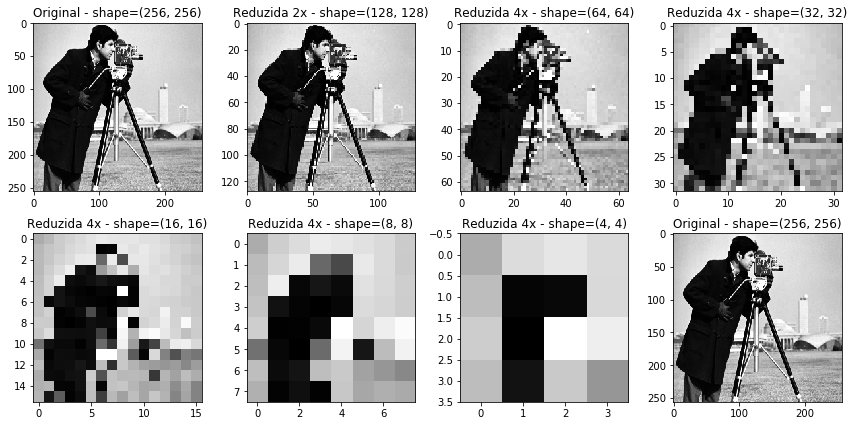

In [203]:
# O subplot é usado apenas para plotar as imagens em 2 colunas
# Mesmo sem usá-lo é possível obter o slide 20, pois é a função imshow que re-escala as imagens
fig, axs = plt.subplots(2,4, figsize=(12, 6))
plt.tight_layout() 

plt.subplot(241)
plt.title('Original - shape=%s' % (g.shape,))
plt.imshow(g,cmap='gray')

plt.subplot(242)
plt.title('Reduzida 2x - shape=%s' % (g1a.shape,))
plt.imshow(g1a,cmap='gray')

plt.subplot(243)
plt.title('Reduzida 4x - shape=%s' % (g2a.shape,))
plt.imshow(g2a,cmap='gray')

plt.subplot(244)
plt.title('Reduzida 4x - shape=%s' % (g3a.shape,))
plt.imshow(g3a,cmap='gray')

plt.subplot(245)
plt.title('Reduzida 4x - shape=%s' % (g4a.shape,))
plt.imshow(g4a,cmap='gray')

plt.subplot(246)
plt.title('Reduzida 4x - shape=%s' % (g5a.shape,))
plt.imshow(g5a,cmap='gray')

plt.subplot(247)
plt.title('Reduzida 4x - shape=%s' % (g6a.shape,))
plt.imshow(g6a,cmap='gray')

plt.subplot(248)
plt.title('Original - shape=%s' % (g.shape,))
plt.imshow(g,cmap='gray')


## Entendendo a transformação radiométrica

## Reproduzindo o slide 26

Para entender a resolução radiométrica, vamos reproduzir o slide 26. Nele, a mesma imagem é mostrada, representada por um número diferente de níveis de cinza. A melhor forma de conseguir isso é dividir a matriz por potências de 2 (sempre se preocupando em obter valores inteiros). 

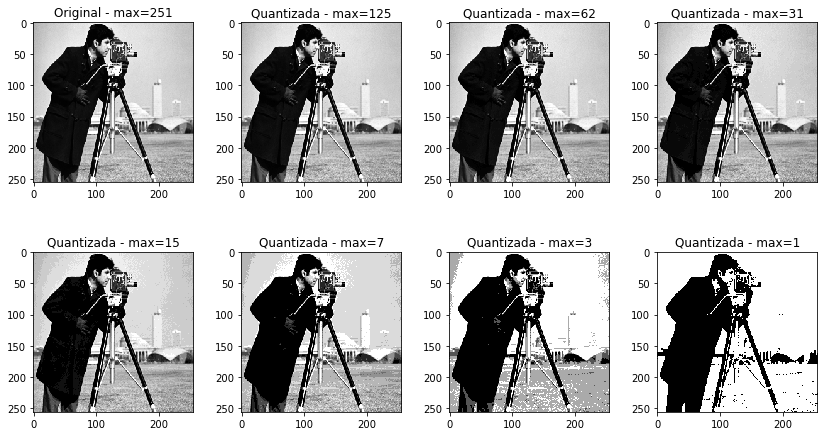

In [205]:
k1 = np.uint8(g/2)
k2 = np.uint8(g/4)
k3 = np.uint8(g/8)
k4 = np.uint8(g/16)
k5 = np.uint8(g/32)
k6 = np.uint8(g/64)
k7 = np.uint8(g/128)

fig, axs = plt.subplots(4, 2, figsize=(12,6))
plt.tight_layout() 

plt.subplot(241)
plt.title('Original - max=%s' % (np.max(g),))
plt.imshow(g,cmap='gray')

plt.subplot(242)
plt.title('Quantizada - max=%s' % (np.max(k1),))
plt.imshow(k1,cmap='gray')

plt.subplot(243)
plt.title('Quantizada - max=%s' % (np.max(k2),))
plt.imshow(k2,cmap='gray')

plt.subplot(244)
plt.title('Quantizada - max=%s' % (np.max(k3),))
plt.imshow(k3,cmap='gray')

plt.subplot(245)
plt.title('Quantizada - max=%s' % (np.max(k4),))
plt.imshow(k4,cmap='gray')

plt.subplot(246)
plt.title('Quantizada - max=%s' % (np.max(k5),))
plt.imshow(k5,cmap='gray')

plt.subplot(247)
plt.title('Quantizada - max=%s' % (np.max(k6),))
plt.imshow(k6,cmap='gray')

plt.subplot(248)
plt.title('Quantizada - max=%s' % (np.max(k7),))
plt.imshow(k7,cmap='gray')